In [1]:
#initializing
list_of_Trainloss_best_epoch=[0,0,0,0,0,0,0,0,0,0]
list_of_Validloss_best_epoch=[0,0,0,0,0,0,0,0,0,0]
list_of_Trainloss=[0,0,0,0,0,0,0,0,0,0]
list_of_Validloss=[0,0,0,0,0,0,0,0,0,0]
list_of_best_index=[0,0,0,0,0,0,0,0,0,0]
N_list_2=[]

In [174]:
N_list=[4000,8000,12000,16000,20000,24000,28000,32000,36000,40000]
N_list_2.append(N_list[len(N_list_2)])
# number of data
N=N_list_2[-1]
print(N)

40000


In [175]:
N_list=[4000,8000,12000,16000,20000,24000,28000,32000,36000,40000]
import matplotlib.pyplot as plt
import numpy as np
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


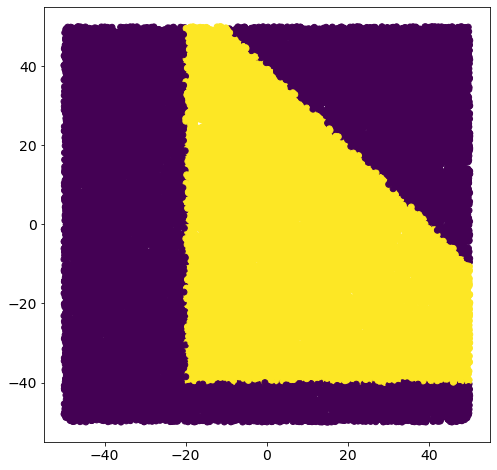

In [176]:
%run nonlinear_function.py

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [177]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

%run nonlinear_function.py

# training data
perc_train = 0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 40000
train: 32000


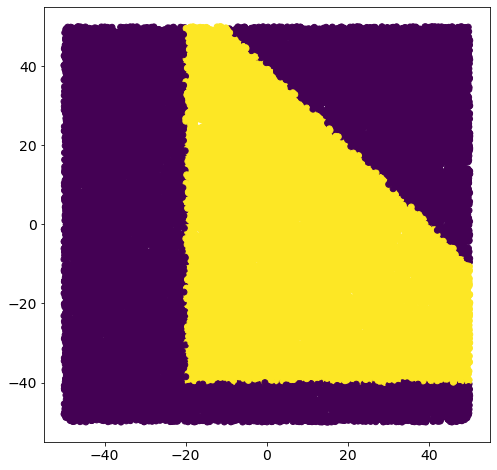

In [178]:
#keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

#dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [179]:
(x_train, y_train) = (x[0:N_train] , y[0:N_train])
(x_valid, y_valid) = (x[N_train:] , y[N_train:])
print('Train:',len(x_train),'\t Validation:',len(x_valid))

Train: 32000 	 Validation: 8000


In [180]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [181]:
#reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(3,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 2)                 6         
                                                                 
 dense_37 (Dense)            (None, 20)                60        
                                                                 
 dense_38 (Dense)            (None, 20)                420       
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [182]:
model.compile(loss='binary_crossentropy',
             #optimizer='RMSprop'
             optimizer='adam',
             metrics=['accuracy'])

In [183]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
640/640 - 1s - loss: 0.5413 - accuracy: 0.7303 - val_loss: 0.3306 - val_accuracy: 0.8914 - 1s/epoch - 2ms/step
Epoch 2/400
640/640 - 1s - loss: 0.2602 - accuracy: 0.9040 - val_loss: 0.1868 - val_accuracy: 0.9346 - 782ms/epoch - 1ms/step
Epoch 3/400
640/640 - 1s - loss: 0.1544 - accuracy: 0.9428 - val_loss: 0.1114 - val_accuracy: 0.9655 - 776ms/epoch - 1ms/step
Epoch 4/400
640/640 - 1s - loss: 0.1003 - accuracy: 0.9689 - val_loss: 0.0788 - val_accuracy: 0.9809 - 754ms/epoch - 1ms/step
Epoch 5/400
640/640 - 1s - loss: 0.0749 - accuracy: 0.9774 - val_loss: 0.0615 - val_accuracy: 0.9811 - 749ms/epoch - 1ms/step
Epoch 6/400
640/640 - 1s - loss: 0.0599 - accuracy: 0.9823 - val_loss: 0.0510 - val_accuracy: 0.9847 - 799ms/epoch - 1ms/step
Epoch 7/400
640/640 - 1s - loss: 0.0495 - accuracy: 0.9851 - val_loss: 0.0383 - val_accuracy: 0.9952 - 928ms/epoch - 1ms/step
Epoch 8/400
640/640 - 1s - loss: 0.0431 - accuracy: 0.9857 - val_loss: 0.0342 - val_accuracy: 0.9912 - 908ms/epoch - 1ms/

Epoch 66/400
640/640 - 1s - loss: 0.0122 - accuracy: 0.9950 - val_loss: 0.0072 - val_accuracy: 0.9970 - 753ms/epoch - 1ms/step
Epoch 67/400
640/640 - 1s - loss: 0.0122 - accuracy: 0.9949 - val_loss: 0.0103 - val_accuracy: 0.9961 - 746ms/epoch - 1ms/step
Epoch 68/400
640/640 - 1s - loss: 0.0129 - accuracy: 0.9950 - val_loss: 0.0140 - val_accuracy: 0.9934 - 732ms/epoch - 1ms/step
Epoch 69/400
640/640 - 1s - loss: 0.0126 - accuracy: 0.9947 - val_loss: 0.0120 - val_accuracy: 0.9961 - 730ms/epoch - 1ms/step
Epoch 70/400
640/640 - 1s - loss: 0.0130 - accuracy: 0.9952 - val_loss: 0.0061 - val_accuracy: 0.9989 - 764ms/epoch - 1ms/step
Epoch 71/400
640/640 - 1s - loss: 0.0116 - accuracy: 0.9958 - val_loss: 0.0077 - val_accuracy: 0.9969 - 815ms/epoch - 1ms/step
Epoch 72/400
640/640 - 1s - loss: 0.0141 - accuracy: 0.9941 - val_loss: 0.0064 - val_accuracy: 0.9987 - 731ms/epoch - 1ms/step
Epoch 73/400
640/640 - 1s - loss: 0.0134 - accuracy: 0.9949 - val_loss: 0.0099 - val_accuracy: 0.9956 - 718ms/e

Epoch 131/400
640/640 - 1s - loss: 0.0111 - accuracy: 0.9955 - val_loss: 0.0089 - val_accuracy: 0.9959 - 729ms/epoch - 1ms/step
Epoch 132/400
640/640 - 1s - loss: 0.0116 - accuracy: 0.9951 - val_loss: 0.0053 - val_accuracy: 0.9977 - 726ms/epoch - 1ms/step
Epoch 133/400
640/640 - 1s - loss: 0.0111 - accuracy: 0.9953 - val_loss: 0.0075 - val_accuracy: 0.9971 - 728ms/epoch - 1ms/step
Epoch 134/400
640/640 - 1s - loss: 0.0109 - accuracy: 0.9953 - val_loss: 0.0077 - val_accuracy: 0.9969 - 724ms/epoch - 1ms/step
Epoch 135/400
640/640 - 1s - loss: 0.0101 - accuracy: 0.9958 - val_loss: 0.0069 - val_accuracy: 0.9976 - 761ms/epoch - 1ms/step
Epoch 136/400
640/640 - 1s - loss: 0.0122 - accuracy: 0.9952 - val_loss: 0.0140 - val_accuracy: 0.9959 - 744ms/epoch - 1ms/step
Epoch 137/400
640/640 - 1s - loss: 0.0117 - accuracy: 0.9953 - val_loss: 0.0067 - val_accuracy: 0.9971 - 731ms/epoch - 1ms/step
Epoch 138/400
640/640 - 1s - loss: 0.0120 - accuracy: 0.9952 - val_loss: 0.0071 - val_accuracy: 0.9970 -

640/640 - 1s - loss: 0.0099 - accuracy: 0.9959 - val_loss: 0.0079 - val_accuracy: 0.9964 - 735ms/epoch - 1ms/step
Epoch 196/400
640/640 - 1s - loss: 0.0102 - accuracy: 0.9960 - val_loss: 0.0078 - val_accuracy: 0.9974 - 726ms/epoch - 1ms/step
Epoch 197/400
640/640 - 1s - loss: 0.0113 - accuracy: 0.9953 - val_loss: 0.0066 - val_accuracy: 0.9977 - 732ms/epoch - 1ms/step
Epoch 198/400
640/640 - 1s - loss: 0.0115 - accuracy: 0.9951 - val_loss: 0.0087 - val_accuracy: 0.9965 - 724ms/epoch - 1ms/step
Epoch 199/400
640/640 - 1s - loss: 0.0106 - accuracy: 0.9959 - val_loss: 0.0042 - val_accuracy: 0.9991 - 1s/epoch - 2ms/step
Epoch 200/400
640/640 - 1s - loss: 0.0110 - accuracy: 0.9949 - val_loss: 0.0151 - val_accuracy: 0.9951 - 745ms/epoch - 1ms/step
Epoch 201/400
640/640 - 1s - loss: 0.0105 - accuracy: 0.9958 - val_loss: 0.0063 - val_accuracy: 0.9973 - 1s/epoch - 2ms/step
Epoch 202/400
640/640 - 2s - loss: 0.0100 - accuracy: 0.9961 - val_loss: 0.0104 - val_accuracy: 0.9949 - 2s/epoch - 3ms/step

Epoch 260/400
640/640 - 1s - loss: 0.0099 - accuracy: 0.9959 - val_loss: 0.0082 - val_accuracy: 0.9965 - 713ms/epoch - 1ms/step
Epoch 261/400
640/640 - 1s - loss: 0.0111 - accuracy: 0.9957 - val_loss: 0.0043 - val_accuracy: 0.9991 - 730ms/epoch - 1ms/step
Epoch 262/400
640/640 - 1s - loss: 0.0104 - accuracy: 0.9956 - val_loss: 0.0055 - val_accuracy: 0.9986 - 729ms/epoch - 1ms/step
Epoch 263/400
640/640 - 1s - loss: 0.0105 - accuracy: 0.9955 - val_loss: 0.0049 - val_accuracy: 0.9980 - 728ms/epoch - 1ms/step
Epoch 264/400
640/640 - 1s - loss: 0.0096 - accuracy: 0.9958 - val_loss: 0.0099 - val_accuracy: 0.9954 - 719ms/epoch - 1ms/step
Epoch 265/400
640/640 - 1s - loss: 0.0111 - accuracy: 0.9952 - val_loss: 0.0047 - val_accuracy: 0.9987 - 725ms/epoch - 1ms/step
Epoch 266/400
640/640 - 1s - loss: 0.0103 - accuracy: 0.9962 - val_loss: 0.0053 - val_accuracy: 0.9981 - 723ms/epoch - 1ms/step
Epoch 267/400
640/640 - 1s - loss: 0.0098 - accuracy: 0.9960 - val_loss: 0.0063 - val_accuracy: 0.9974 -

640/640 - 1s - loss: 0.0106 - accuracy: 0.9958 - val_loss: 0.0036 - val_accuracy: 0.9994 - 771ms/epoch - 1ms/step
Epoch 325/400
640/640 - 1s - loss: 0.0103 - accuracy: 0.9959 - val_loss: 0.0047 - val_accuracy: 0.9989 - 741ms/epoch - 1ms/step
Epoch 326/400
640/640 - 1s - loss: 0.0105 - accuracy: 0.9962 - val_loss: 0.0044 - val_accuracy: 0.9985 - 776ms/epoch - 1ms/step
Epoch 327/400
640/640 - 1s - loss: 0.0106 - accuracy: 0.9956 - val_loss: 0.0044 - val_accuracy: 0.9990 - 739ms/epoch - 1ms/step
Epoch 328/400
640/640 - 1s - loss: 0.0106 - accuracy: 0.9957 - val_loss: 0.0049 - val_accuracy: 0.9990 - 740ms/epoch - 1ms/step
Epoch 329/400
640/640 - 1s - loss: 0.0095 - accuracy: 0.9963 - val_loss: 0.0053 - val_accuracy: 0.9983 - 731ms/epoch - 1ms/step
Epoch 330/400
640/640 - 1s - loss: 0.0103 - accuracy: 0.9959 - val_loss: 0.0046 - val_accuracy: 0.9986 - 728ms/epoch - 1ms/step
Epoch 331/400
640/640 - 1s - loss: 0.0103 - accuracy: 0.9957 - val_loss: 0.0043 - val_accuracy: 0.9985 - 735ms/epoch -

Epoch 389/400
640/640 - 1s - loss: 0.0099 - accuracy: 0.9959 - val_loss: 0.0068 - val_accuracy: 0.9970 - 789ms/epoch - 1ms/step
Epoch 390/400
640/640 - 1s - loss: 0.0097 - accuracy: 0.9958 - val_loss: 0.0222 - val_accuracy: 0.9918 - 762ms/epoch - 1ms/step
Epoch 391/400
640/640 - 1s - loss: 0.0095 - accuracy: 0.9962 - val_loss: 0.0061 - val_accuracy: 0.9970 - 761ms/epoch - 1ms/step
Epoch 392/400
640/640 - 1s - loss: 0.0097 - accuracy: 0.9961 - val_loss: 0.0095 - val_accuracy: 0.9950 - 734ms/epoch - 1ms/step
Epoch 393/400
640/640 - 1s - loss: 0.0099 - accuracy: 0.9960 - val_loss: 0.0097 - val_accuracy: 0.9952 - 1s/epoch - 2ms/step
Epoch 394/400
640/640 - 1s - loss: 0.0092 - accuracy: 0.9962 - val_loss: 0.0122 - val_accuracy: 0.9956 - 1s/epoch - 2ms/step
Epoch 395/400
640/640 - 1s - loss: 0.0101 - accuracy: 0.9960 - val_loss: 0.0059 - val_accuracy: 0.9984 - 952ms/epoch - 1ms/step
Epoch 396/400
640/640 - 1s - loss: 0.0100 - accuracy: 0.9958 - val_loss: 0.0058 - val_accuracy: 0.9977 - 1s/ep

In [184]:
validation_loss = np.array(fit.history['val_loss'])
Training_loss = np.array(fit.history['loss'])
t=0
while (t==0) and (len(Training_loss)!=0):
    index = np.argmin(Training_loss)
    if fit.history['loss'][index]>=fit.history['val_loss'][index]:
        index_of_best_model=index
        t=1
        print(index)
    else:
        Training_loss=np.delete(Training_loss,index)
        
print(index_of_best_model)

316
316


In [185]:
        
list_of_best_index[N_list.index(N)]=index_of_best_model
list_of_Trainloss_best_epoch[N_list.index(N)]=fit.history['loss'][index_of_best_model]
list_of_Validloss_best_epoch[N_list.index(N)]=fit.history['val_loss'][index_of_best_model]
list_of_Trainloss[N_list.index(N)]=fit.history['loss'][-1]
list_of_Validloss[N_list.index(N)]=fit.history['val_loss'][-1]
print(list_of_best_index)


[391, 324, 377, 350, 330, 315, 397, 390, 368, 316]


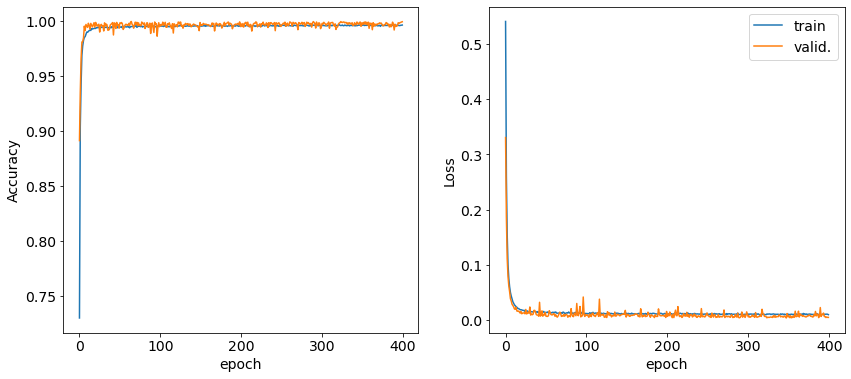

In [186]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
plt.savefig('plot_of _increase' + str(N_list.index(N)) + '.png')




In [187]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE
print(np.var(X1))
grid_r = grid/50
print(grid_r)

pred = model.predict(grid_r)

51 2601
[50. 50.]
866.6666666666666
[[-1.   -1.  ]
 [-0.96 -1.  ]
 [-0.92 -1.  ]
 ...
 [ 0.92  1.  ]
 [ 0.96  1.  ]
 [ 1.    1.  ]]


9


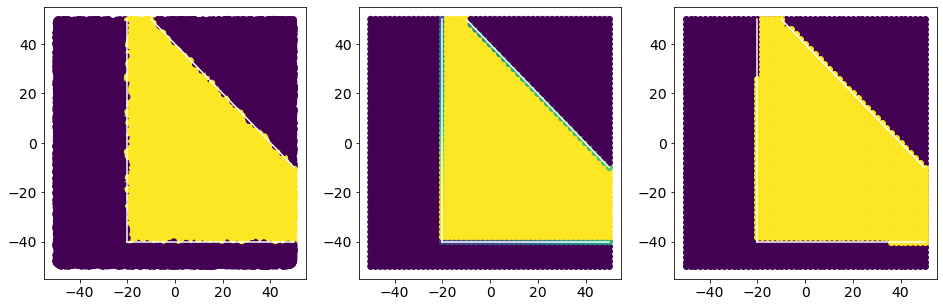

In [188]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show
plt.savefig('result_of _increase' + str(N_list.index(N)) + '.png')
print(N_list.index(N))

In [189]:
print("Trainloss",list_of_Trainloss)
print("Validloss",list_of_Validloss)
np.savetxt(filename("Trainloss_increase",TYPE),list_of_Trainloss)
np.savetxt(filename("Validloss_increase",TYPE),list_of_Validloss)


Trainloss [0.029237668961286545, 0.015917880460619926, 0.026113908737897873, 0.019840138033032417, 0.021619729697704315, 0.013344855047762394, 0.19324009120464325, 0.01771222986280918, 0.011975323781371117, 0.00932714156806469]
Validloss [0.017126761376857758, 0.020473210141062737, 0.036417726427316666, 0.020448410883545876, 0.0198072399944067, 0.009667380712926388, 0.1850157529115677, 0.012858014553785324, 0.01035243459045887, 0.004388649016618729]


In [190]:
print("Trainloss_best_epoch",list_of_Trainloss_best_epoch)
print("Validloss_best_epoch",list_of_Validloss_best_epoch)
np.savetxt(filename("Trainloss_increase_best_epoch",TYPE),list_of_Trainloss_best_epoch)
np.savetxt(filename("Validloss_increase_best_epoch",TYPE),list_of_Validloss_best_epoch)

Trainloss_best_epoch [0.018120834603905678, 0.01299798209220171, 0.021483134478330612, 0.015481602400541306, 0.017893875017762184, 0.01186095830053091, 0.19277948141098022, 0.017827972769737244, 0.009554872289299965, 0.008354953490197659]
Validloss_best_epoch [0.010746841318905354, 0.011643643490970135, 0.020521098747849464, 0.0070221335627138615, 0.012522188946604729, 0.009196016006171703, 0.18333768844604492, 0.00976199097931385, 0.007121832109987736, 0.006156417075544596]


(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

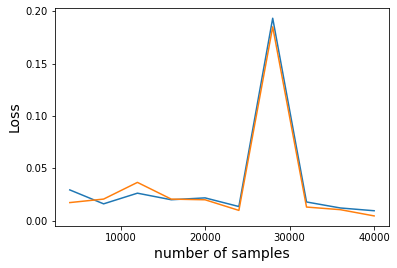

In [191]:
plt.plot(N_list,list_of_Trainloss)
plt.plot(N_list,list_of_Validloss)
plt.xlabel("number of samples")
plt.ylabel("Loss")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.savefig('plot_increase.png')



(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

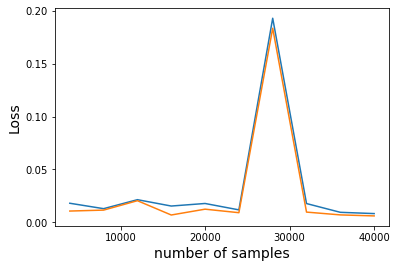

In [192]:
plt.plot(N_list,list_of_Trainloss_best_epoch)
plt.plot(N_list,list_of_Validloss_best_epoch)
plt.xlabel("number of samples")
plt.ylabel("Loss")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

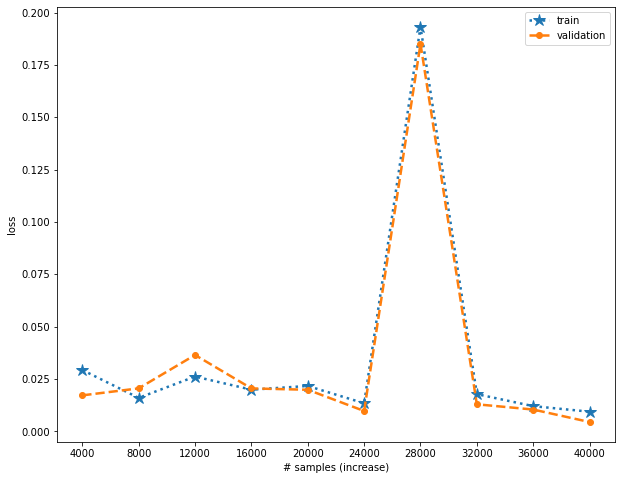

In [2]:
def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"
TYPE=1
import numpy as np
import matplotlib.pyplot as plt
x = np.loadtxt(filename("Trainloss_increase",TYPE), delimiter=' ')
y = np.loadtxt(filename("Validloss_increase",TYPE), delimiter=' ')
N_list=[4000,8000,12000,16000,20000,24000,28000,32000,36000,40000]

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(N_list, x, label = 'train', linestyle = 'dotted', marker = '*', markersize = 12,linewidth ='2.5')
ax.plot(N_list, y, label = 'validation',linestyle = 'dashed', marker = '.',markersize = 12, linewidth ='2.5')
ax.set_xlabel('# samples (increase)')
ax.set_ylabel('loss')
#plt.xticks(N_list)
ax.set_xticks(N_list)

ax.set_xticklabels(N_list)

plt.legend(loc = 'best')
plt.savefig('plot_increase.png')

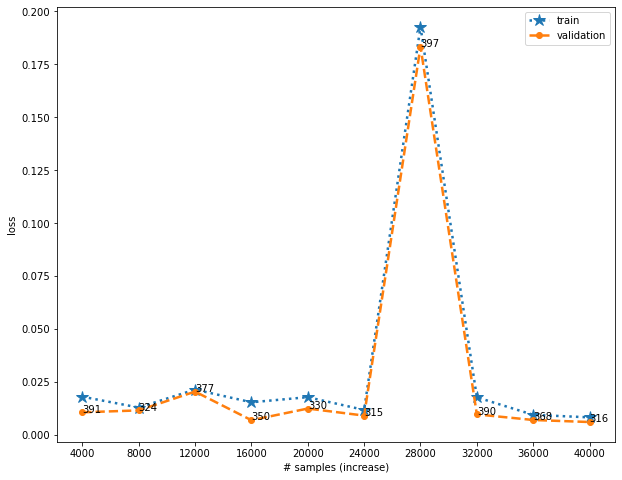

In [5]:
x = np.loadtxt(filename("Trainloss_increase_best_epoch",TYPE), delimiter=' ')
y = np.loadtxt(filename("Validloss_increase_best_epoch",TYPE), delimiter=' ')
N_list=[4000,8000,12000,16000,20000,24000,28000,32000,36000,40000]
list_of_best_index=[391, 324, 377, 350, 330, 315, 397, 390, 368, 316]
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(N_list, x, label = 'train', linestyle = 'dotted', marker = '*', markersize = 12,linewidth ='2.5')
ax.plot(N_list, y, label = 'validation',linestyle = 'dashed', marker = '.',markersize = 12, linewidth ='2.5')
ax.set_xlabel('# samples (increase)')
ax.set_ylabel('loss')
#plt.xticks(N_list)
ax.set_xticks(N_list)

ax.set_xticklabels(N_list)

for i, txt in enumerate(list_of_best_index):
    ax.annotate(txt, xy = (N_list[i], y[i]))
plt.legend(loc = 'best')
plt.savefig('plot_increase_best_epoch.png')